Student ID: 3034963465

In [ ]:
import numpy as np
import pandas as pd 
import os
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib notebook
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


In [ ]:
import sys
!{sys.executable} -m pip install mat73
import mat73

!{sys.executable} -m pip install ffmpeg
import ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Part 1**

In [ ]:
n_rods = 300
delta_t = .033 #set from the PS doc
tau = 0.5 #set from the PS doc
alpha = delta_t/tau 
num_frames_per_s = 1/30 # 30 seconds per frame
resting_potential = -35 # i think this is the resting potential for a rod , but should check ?
retina_r = resting_potential*np.ones([n_rods,n_rods]) # initialize the 300x300 rod patch with resting potential
num_seconds = 3 # number of seconds for a movie
iterations = np.arange(0,num_seconds,num_frames_per_s) #for iteration, we want to iterate through each frame of each second
retina = resting_potential*np.ones([n_rods,n_rods]) 

def leaky_integrator(alpha,x,prev_y): # the leaky integrator triggered when an event happens with probability p
    y = ((1-alpha)*prev_y) + (alpha*x)
    return y 

def is_random_event(p,delta_t): # determine if the random event has ocurred?
    rand_number = random.uniform(0, 1)
    if rand_number < p:
        x_t = 1/delta_t
    else:
        x_t = 0
    
    return x_t

num_s_for_event = 160 # for noise/random stuff there is probability of activation 1 event/ 160 seconds 
p = (1/num_s_for_event)*.033 #probability that the event has ocurred in the timeframe


def retina_sim(n_rods, resting_potential, retina_r, p, delta_t, alpha):


    retina_iterations_random =[] 
    count_random_iterations = []

    for t, time in enumerate(iterations):
        count_random = np.zeros([n_rods,n_rods])
        retina = resting_potential*np.ones([n_rods,n_rods])
        if t == 0:
            retina_iterations_random.append(retina_r)
        else:
            for nr_1 in np.arange(n_rods):
                for nr_2 in np.arange(n_rods):
                    x_t = is_random_event(p,delta_t)
                    retina[nr_1,nr_2] = leaky_integrator(alpha,x_t,retina_iterations_random[t-1][nr_1][nr_2])
                    if x_t !=0:
                        count_random[nr_1,nr_2]=1

        retina_iterations_random.append(retina)
        count_random_iterations.append(count_random)

    return retina_iterations_random,count_random_iterations
    

retina_iterations_random,count_random_iterations = retina_sim(300, resting_potential, retina_r, (1/160)*delta_t, delta_t, alpha)    
retina_iterations_photon,count_photon_iterations = retina_sim(300, resting_potential, retina_r, (1/5000)*delta_t, delta_t, alpha)    
retina_iterations_random_photon,count_random_photon_iterations = retina_sim(300, resting_potential, retina_r, ((1/5000)+(1/160))*delta_t, delta_t, alpha)    
   


In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def getImageFromList(x):
  
    return retina_iterations_random[x]

ims=[]
for i in range(len(retina_iterations_random)):
    im = plt.imshow(getImageFromList(i), animated=True,cmap="hot")
    ims.append([im])

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=10, blit=True)
plt.title('Simulated retina patch - random')

plt.close()

# Show the animation
HTML(ani.to_html5_video())

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def getImageFromList(x):
  
    return retina_iterations_photon[x]

ims=[]
for i in range(len(retina_iterations_photon)):
    im = plt.imshow(getImageFromList(i), animated=True,cmap="hot")
    ims.append([im])

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=10, blit=True)
plt.title('Simulated retina patch - photon')

plt.close()

# Show the animation
HTML(ani.to_html5_video())

In [ ]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def getImageFromList(x):
  
    return retina_iterations_random_photon[x]

ims=[]
for i in range(len(retina_iterations_random_photon)):
    im = plt.imshow(getImageFromList(i), animated=True,cmap="hot")
    ims.append([im])

ani = matplotlib.animation.ArtistAnimation(fig, ims, interval=10, blit=True)
plt.title('Simulated retina patch - random + photon')

plt.close()

# Show the animation
HTML(ani.to_html5_video())

In [ ]:
time_n     = 30
space_n_1d = 175

num_trials = 4000

photon_detected = []
frames_array = np.arange(0, num_seconds, delta_t)


for sim_trial in np.arange(num_trials):
    
    #Random index in time frames 
    random_start_t = np.int64(np.random.rand()*(len(frames_array)-time_n))
    
    #Random index in space frames
    random_start_s = np.int64(np.random.rand()*(300-space_n_1d))


# Integrate over the specified space and time regions for each case
    event_count_noise            = 0
    event_count_noise_and_signal = 0
    
    # For each time point in range, grab the corresponding frame and sum over the spatial 
    # dimensions starting at random space index 
    
    for time_point in np.arange(random_start_t,random_start_t + time_n):
        event_count_noise            += np.sum(count_random_iterations[time_point][random_start_s:random_start_s+space_n_1d, random_start_s:random_start_s+space_n_1d])
        event_count_noise_and_signal += np.sum(count_random_photon_iterations[time_point][random_start_s:random_start_s+space_n_1d, random_start_s:random_start_s+space_n_1d])
        
# Store correct vs. incorrect each trial
    
    if event_count_noise_and_signal > event_count_noise:
        photon_detected.append(1)
    else:
        photon_detected.append(0)

print("Final detection accuarcy for photon only vs noise+photon")
print(((np.sum(photon_detected)/num_trials)*100))

Final detection accuarcy for photon only vs noise+photon
35.18


# **Part 2**

In [ ]:
datadir = "/content/gdrive/MyDrive/NeuralComputation/"
dataset = mat73.loadmat(datadir+'PS2_Part2_dataset.mat')
signal = dataset['signal']
time = dataset['time']*1000


Text(0, 0.5, 'Amplitude')

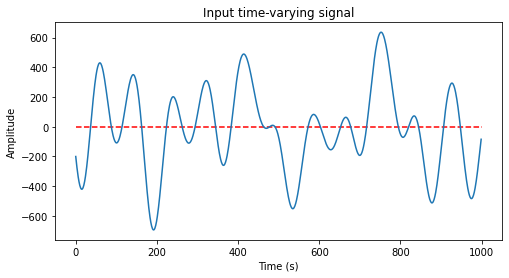

In [ ]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, signal)
plt.hlines(xmin=0, xmax=1000, y=0, color='red', linestyle='dashed')
plt.title('Input time-varying signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


In [ ]:
signal_on = np.array([signal[i] if signal[i]>0 else 0 for i in np.arange(len(signal))])
signal_off = np.negative(np.array([signal[i] if signal[i]<0 else 0 for i in np.arange(len(signal))]))


In [ ]:
#parameters
V_rest = -70
V_threshold = -55
C = 50
G_leak = 5
t_rest = 5
tau = C / G_leak
delta_t = time[1]-time[0]
sim_time_total = np.round(np.max(time))
alpha = delta_t / tau

In [ ]:
# on neuron
V_on = np.zeros_like(time)
spikes_on = np.zeros_like(time)
spikes_time_on = []
refractory_count_ms = 0

for n, t in enumerate(time):

    if n == 0:
        V_on[n] = V_rest

    elif (refractory_count_ms > 0) and (refractory_count_ms <= 5):
        V_on[n] = V_rest
        refractory_count_ms += 1

    else:
        V_on[n] = ((1 - alpha) * V_on[n - 1]) + (alpha * (V_rest + (1 / G_leak) * signal_on[n]))
        refractory_count_ms = 0

        if V_on[n] >= V_threshold:
            spikes_on[n] = 1
            spikes_time_on.append(t)
            V_on[n] = V_rest
            refractory_count_ms += 1

In [ ]:


for n, t in enumerate(time):

    if n == 0:
        V_on[n] = V_rest

    elif (refractory_count_ms > 0) and (refractory_count_ms <= 5):
        V_on[n] = V_rest
        refractory_count_ms += 1

    else:
        V_on[n] = ((1 - alpha) * V_on[n - 1]) + (alpha * (V_rest + (1 / G_leak) * signal_on[n]))
        refractory_count_ms = 0

        if V_on[n] >= V_threshold:
            spikes_on[n] = 1
            spikes_time_on.append(t)
            V_on[n] = V_rest
            refractory_count_ms += 1



Text(0.5, 1.0, '"On"-type Neuron\n Total Number of Spikes = 34.0\n')

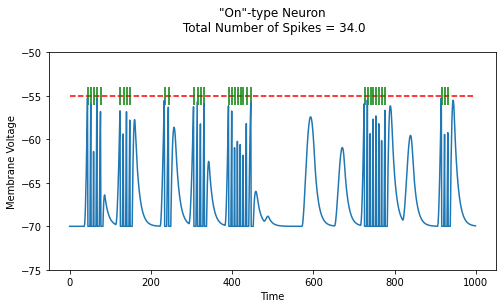

In [ ]:
# off neuron
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, V_on )
plt.xlabel('Time')
plt.ylabel('Membrane Voltage')
plt.ylim(-75, -50)
plt.hlines(xmin=0, xmax=np.max(time), y=-55, color='red', linestyle='dashed')
plt.eventplot(spikes_time_on,
              orientation='horizontal',
              lineoffsets=-55,
              linelengths=2,
              color='green')
plt.title('"On"-type Neuron\n Total Number of Spikes = ' + str(np.sum(spikes_on)) + "\n")



In [ ]:
# off neuron

V_off = np.zeros_like(time)
spikes_off = np.zeros_like(time)
spikes_time_off = []
refractory_count = 0
for n, t in enumerate(time):

    if n == 0:
        V_off[n] = V_rest

    elif (refractory_count > 0) and (refractory_count <= 5):
        V_off[n] = V_rest
        refractory_count += 1

    else:
        V_off[n] = (1 - alpha) * V_off[n - 1] + alpha * (V_rest + (1 / G_leak) * signal_off[n])
        refractory_count = 0

        if V_off[n] >= V_threshold:
            spikes_off[n] = 1
            spikes_time_off.append(t)
            V_off[n] = V_rest
            refractory_count += 1


Text(0.5, 1.0, '"Off"-type Neuron\n Total Number of Spikes = 40.0\n')

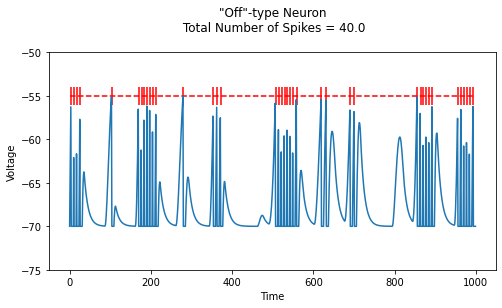

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, V_off)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.ylim(-75, -50)
plt.hlines(xmin=0, xmax=np.max(time), y=-55, color='red', linestyle='dashed')
plt.eventplot(spikes_time_off,
              orientation='horizontal',
              lineoffsets=-55,
              linelengths=2,
              color='red')
plt.title('"Off"-type Neuron\n Total Number of Spikes = ' + str(np.sum(spikes_off)) + "\n")


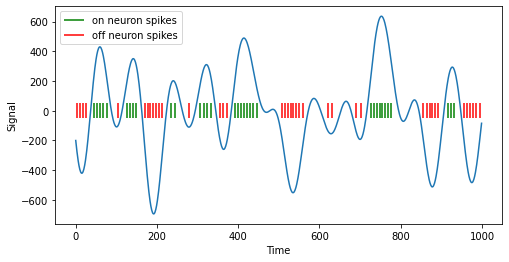

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, signal )
plt.xlabel('Time')
plt.ylabel('Signal')
# # plt.hlines(xmin=0, xmax=np.max(time/1000), y=-55, color='red', linestyle='dashed')
plt.eventplot(spikes_time_on,
              orientation='horizontal',
              lineoffsets=0,
              linelengths=100,
              color='green',
              label = 'on neuron spikes')

plt.eventplot(spikes_time_off,
              orientation='horizontal',
              lineoffsets=0,
              linelengths=100,
              color='red',
              label = 'off neuron spikes')

plt.legend()



Root mean sq error between original and decoded signal = 26.77


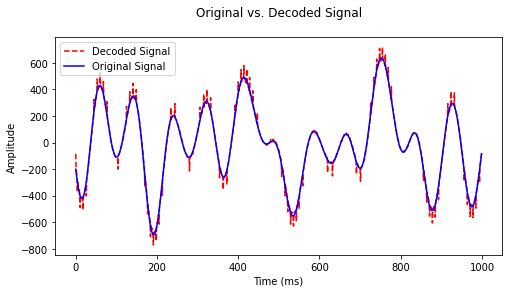

In [ ]:
# decode spikes ....
transformed_signal = np.fft.fft(signal)
sum_of_spikes = (-1*spikes_on + spikes_off)
transformed_sos = np.fft.fft(sum_of_spikes)
h_frequency = (transformed_signal * np.conj(transformed_sos)) /(np.abs(transformed_sos)**2)
h_time = np.real(np.fft.ifft(h_frequency))
x_time = np.convolve(sum_of_spikes, h_time) 
x_time = x_time[:sum_of_spikes.shape[0]] + x_time[-sum_of_spikes.shape[0]:] #x_time[0:1000]+x_time[999:1999]
 
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, x_time, color='red', linestyle='dashed', label='Decoded Signal')
plt.plot(time, signal, color='blue', label='Original Signal')
plt.title('Original vs. Decoded Signal\n')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.legend()
RMSE = np.sqrt(np.sum((signal - x_time)**2)/len(signal))
print('Root mean sq error between original and decoded signal = '+str(np.round(RMSE,2)))



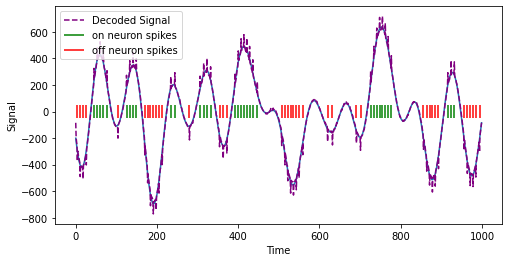

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(time, signal )
plt.plot(time, x_time, color='purple', linestyle='dashed', label='Decoded Signal')

plt.xlabel('Time')
plt.ylabel('Signal')
# # plt.hlines(xmin=0, xmax=np.max(time/1000), y=-55, color='red', linestyle='dashed')
plt.eventplot(spikes_time_on,
              orientation='horizontal',
              lineoffsets=0,
              linelengths=100,
              color='green',
              label = 'on neuron spikes')

plt.eventplot(spikes_time_off,
              orientation='horizontal',
              lineoffsets=0,
              linelengths=100,
              color='red',
              label = 'off neuron spikes')

plt.legend()
